## TRF LOG CHECKING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import pymedphys
from pymedphys import Delivery
import os

DICOM_path =  'D:\\VM Settings\\XHTOMODATA RAW\\0025\\0025_VMATQATEST.dcm'
plan_dcm = pydicom.read_file(DICOM_path, force=True)

trf_path = 'D:\\VM Settings\\XHTOMODATA RAW\\TRF\\0025.trf'
pd_trf_table = pymedphys.trf.read(trf_path)
trf_table = pd_trf_table[1]


In [5]:
max_dose_rate = []
pt_id = ['002','003','004','005','006','009','0010','0015','0016','0017','0019','0020','0023','0024','0025','0026','0028']
for item in pt_id:
    trf_path = 'D:\\VM Settings\\XHTOMODATA RAW\\TRF\\'+ item +'.trf'
    pd_trf_table = pymedphys.trf.read(trf_path)
    trf_table = pd_trf_table[1]
    max_dose_rate.append(np.max(trf_table['Actual Dose Rate/Actual Value (Mu/min)']))

In [ ]:
max_dose_rate

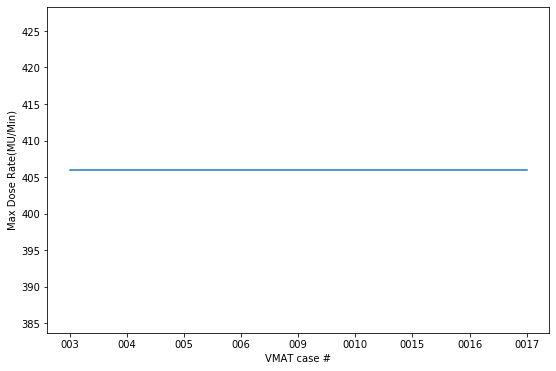

In [7]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.plot(max_dose_rate)
ax.set_xticklabels(pt_id)
ax.set_xlabel('VMAT case #')
ax.set_ylabel('Max Dose Rate(MU/Min)')
plt.show()

In [8]:
plan_dcm.BeamSequence[0].ControlPointSequence[0]
DCM_CP_inf = {'MLC':[],'JAW':[],'MU':[],'Gantry':[]}
for i in range(len(plan_dcm.BeamSequence[0].ControlPointSequence)):
#     DCM_CP_inf['MLC']
#     DCM_CP_inf['JAW']
#     DCM_CP_inf['MU']
    DCM_CP_inf['Gantry'].append(float(plan_dcm.BeamSequence[0].ControlPointSequence[i].GantryAngle))

In [ ]:
TRF_CPs,TRF_CP_inf = {},{'MLC':[],'JAW':[],'MU':[],'Gantry':[]}
for i in range(int(max(trf_table['Control point/Actual Value (None)']))):
#     print('This is {}th control point'.format(i+1))
    TRF_CPs[i+1] = trf_table[(trf_table['Control point/Actual Value (None)'] == i+1) & (trf_table['Linac State/Actual Value (None)'] == 'Radiation On')]
    MLC_A = [-TRF_CPs[i+1].iloc[-1]['Y2 Leaf '+ str(j+1) + '/Scaled Actual (mm)'] for j in range(80)]
    MLC_B = [TRF_CPs[i+1].iloc[-1]['Y1 Leaf '+ str(j+1) + '/Scaled Actual (mm)'] for j in range(80)]
    TRF_CP_inf['MLC'].append([MLC_A, MLC_B])
    TRF_CP_inf['JAW'].append([-TRF_CPs[i+1].iloc[-1]['X2 Diaphragm/Scaled Actual (mm)'],TRF_CPs[i+1].iloc[-1]['X1 Diaphragm/Scaled Actual (mm)']])
    TRF_CP_inf['MU'].append(TRF_CPs[i+1]['Step Dose/Actual Value (Mu)'].iloc[-1] - TRF_CPs[i+1]['Step Dose/Actual Value (Mu)'].iloc[0])
    TRF_CP_inf['Gantry'].append(TRF_CPs[i+1]['Step Gantry/Scaled Actual (deg)'].iloc[-1])

In [5]:
len(TRF_CP_inf['Gantry']),len(DCM_CP_inf['Gantry'])

(138, 132)

In [110]:
TRF_CP_inf['Gantry'][0],DCM_CP_inf['Gantry'][1]

(-178.1, 182.0)

### Compare MLC positions within field between TRF and DICOM 


Index(['unknown2', 'unknown3', 'unknown4', 'Control point/Actual Value (None)',
       'Energy Cal Block/Set (None)', 'Linac State/Actual Value (None)',
       'Actual Dose Rate/Actual Value (Mu/min)', 'Step Dose/Actual Value (Mu)',
       'Dose/Raw value (1/64th Mu)', 'PRF Pauses/Actual Value (None)',
       'Wedge Position/Actual Value (None)', 'Step Gantry/Scaled Actual (deg)',
       'Step Gantry/Positional Error (deg)',
       'Step Collimator/Scaled Actual (deg)',
       'Step Collimator/Positional Error (deg)',
       'Table Isocentric/Scaled Actual (deg)',
       'Table Isocentric/Positional Error (deg)',
       'Table Longitudinal/Scaled Actual (deg)',
       'Table Longitudinal/Positional Error (deg)',
       'Table Lateral/Scaled Actual (deg)',
       'Table Lateral/Positional Error (deg)',
       'Table Height/Scaled Actual (deg)',
       'Table Height/Positional Error (deg)',
       'X1 Diaphragm/Scaled Actual (mm)', 'X2 Diaphragm/Scaled Actual (mm)',
       'X1 Diaphragm/

In [79]:
MLC_A = [-TRF_CPs[15].iloc[-1]['Y2 Leaf '+ str(j+1) + '/Scaled Actual (mm)'] for j in range(80)]